# ARIMAX vs. ARDL Models

Study of the EDF CDS 

In [53]:
# Dataframe, maths and plotting packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [50]:
########### Load and prepare data ###########
# Import data
df = pd.read_excel('Data ATS.xlsx')
# Extract and sort chronologicaly EDF CDS data
df_EDF = df.iloc[3:,4:6]
df_EDF = df_EDF.rename(columns={"Unnamed: 4": "Date", "Unnamed: 5": "Last Price"}).sort_values(by="Date", ascending=True)
# Compute continuous quarterly return
df_EDF['Continuous Return'] = df_EDF['Last Price'].pct_change()
df_EDF_ret = df_EDF['Continuous Return'].iloc[1:]
df_EDF_ret

3325   -0.051191
3324   -0.024634
3323    0.002472
3322   -0.007370
3321    0.025126
          ...   
7       0.027323
6       0.000884
5       0.011021
4       0.019553
3      -0.014776
Name: Continuous Return, Length: 3323, dtype: float64

/var/folders/mg/m26g3t3518j6bhs84_z6y9q80000gn/T/ipykernel_73848/4198530727.py:14: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


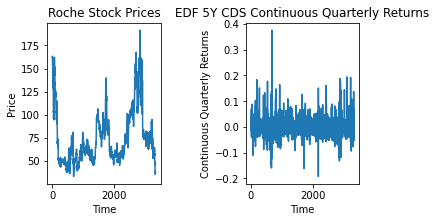

In [42]:
########### Visual representation ###########
# Check the CDS price's fluctuation
plt.subplot(1, 2, 1)
plt.plot(df_EDF['Last Price'])
plt.title("Roche Stock Prices")
plt.xlabel('Time')
plt.ylabel('Price')
# Check the evolution of quarterly returns
plt.subplot(1, 2, 2)
plt.plot(df_EDF.iloc[1:,2])
plt.title("EDF 5Y CDS Continuous Quarterly Returns")
plt.xlabel('Time')
plt.ylabel('Continuous Quarterly Returns')
plt.tight_layout(4)
# Identify trends

In [54]:
########### Box-Jenkins Approach ###########
# Identification: Check appropriate specification of the model
# -> Use ACF/PACF and Information Criteria (BIC to forecast)


# Review stationarity assumption: ADF test
test = adfuller(df_EDF_ret)
df_adf = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['Output'])
df_adf['Output']['Test Statistic Value'] = test[0]
df_adf['Output']['p-value'] = test[1]
df_adf['Output']['Lags Used'] = test[2]
df_adf['Output']['Number of Observations Used'] = test[3]
df_adf['Output']['Critical Value(1%)'] = test[4]['1%']
df_adf['Output']['Critical Value(5%)'] = test[4]['5%']
df_adf['Output']['Critical Value(10%)'] = test[4]['10%']
df_adf
# The null hypothesis is rejected: the process is stationary (pvalue below thresholds & t-stat < critical value)
# No need to differentiate or detrend

,Output
Test Statistic Value,-16.321823
p-value,0.0
Lags Used,9
Number of Observations Used,3313
Critical Value(1%),-3.432325
Critical Value(5%),-2.862413
Critical Value(10%),-2.567235


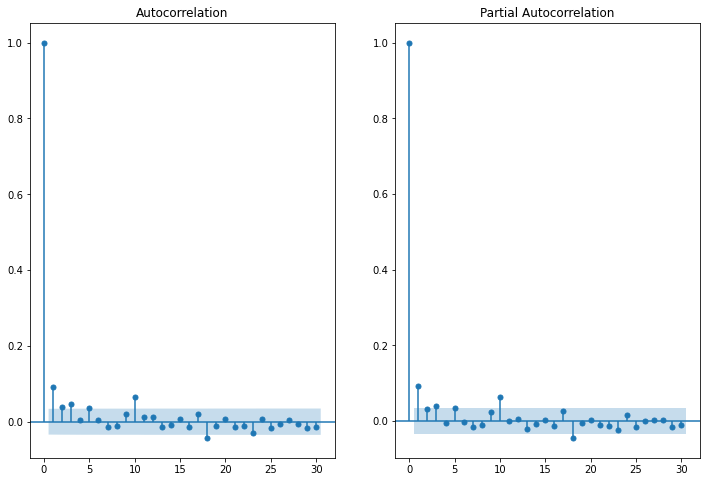

In [55]:
########### Analyze ACF/PACF to identify parameters ###########

# ACF plot with 95% confidence interval
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(df_EDF_ret, alpha=0.05,lags=30, ax=ax1)
# PACF plot with 95% confidence interval
ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(df_EDF_ret, alpha=0.05,lags=30, ax=ax2)